In [2]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [3]:
z_data=pd.read_csv("Zoo.csv")

In [4]:
z_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
z_data["animal name"].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [6]:
z_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [7]:
X1=z_data.iloc[:,1:-1]

In [9]:
X1=(X1-X1.min(axis=0))/(X1.max(axis=0)-X1.min(axis=0))

In [10]:
X1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [11]:
Y1=z_data.iloc[:,-1]

# Training and Testing the data

#randomly we take value of k=10 

In [12]:
num_folds=10
kfold=KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [52]:
model1=KNeighborsClassifier(n_neighbors=10)
result=cross_val_score(model1,X1,Y1,cv=kfold,error_score='raise')


In [53]:
print(result.mean())

0.9100000000000001


# Finding the best value of k

In [38]:
k_list=np.array([2*i+1 for i in range(0,25)])
k_list

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [39]:
param_grid=dict(n_neighbors=k_list)

In [40]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49])}

In [41]:
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=param_grid,error_score='raise',cv=4)
grid.fit(X1,Y1)

GridSearchCV(cv=4, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [42]:
print(grid.best_score_)

0.9503846153846154


In [43]:
print(grid.best_params_)

{'n_neighbors': 1}


In [ ]:
K can not be 1 because it will give accuracy high , but there will be very high error

# Visualization of accuracy for different K values

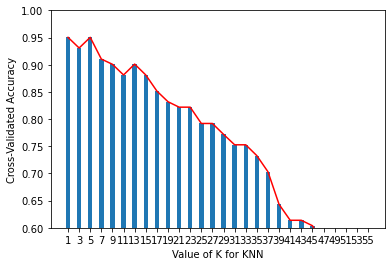

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range=[2*i+1 for i in range(0,28)]
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X1,Y1,cv=4)
    k_score.append(scores.mean())
#ploting the graph
plt.bar(k_range,k_score)
plt.plot(k_range,k_score,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [ ]:
The K value is 5

In [54]:
model1=KNeighborsClassifier(n_neighbors=5)
result=cross_val_score(model1,X1,Y1,cv=kfold,error_score='raise')



In [55]:
print(result.mean())

0.93


# we get 93% Accuracy for value of K =5